In [8]:
!pip install japanize_matplotlib -q
!pip install ipywidgets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 35.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.2 MB/s eta 0:00:00


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib
from ipywidgets import interact

# 勾配降下法
勾配（微分値）に応じて、パラメータを変化させる手法

## アルゴリズムの概要
xとyはすでに得られたデータ
$$
\hat{y} = f_w(X) \\
J = \frac{1}{2N}||y - \hat{y}||^2 \\
w_i := w_i - α\frac{\partial J}{\partial w_i}
$$
得られた$w_i$を用いて、パラメータを更新



## Tips
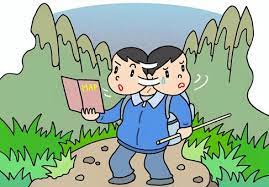

夜，山からふもとへ**出来るだけ速く**下ることを考えよう．

しかし，周りを見渡しても自分の足元しか見えない．

どうする？

とりあえず，傾きが急な方向に向かって降りてみれば，速くふもとにつけるかもしれない．

しかし，行った先がふもとかどうかはわからない…．

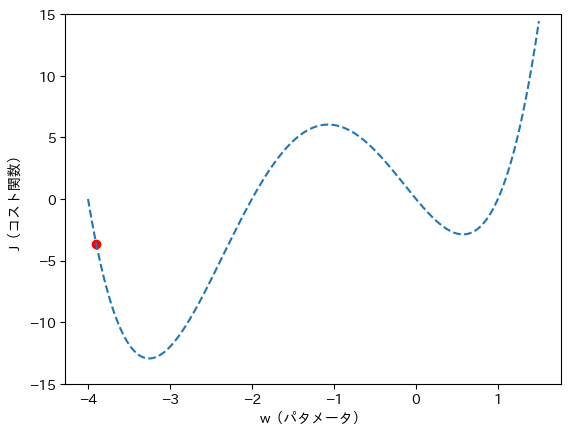

In [10]:
#@title　初期化（勾配降下法をさせる最初の位置を指定）
#初期化
def f(x):
    return x**4 + 5*(x**3)+2*(x**2)-8*x
w = -3.9
alpha = 0.1
iter = 50
_ = np.linspace(-4, 1.5, 1000)
plt.plot(_, f(_), linestyle="dashed")
plt.scatter(w, f(w), c="r")
plt.ylim(-15, 15)
plt.xlabel("w（パタメータ）")
plt.ylabel("J（コスト関数）")
plt.show()

In [11]:
#@title 勾配降下法をgif出力
#勾配降下法を視覚的に確認する
import os
from PIL import Image
import glob

def df(x):
    return 4*(x**3) + 15*(x**2) + 4*(x) - 8
alpha = 0.075
# 0.01 ->local minimum trap
# 0.1 -> diverge
# 0.5 -> diverge to inf
iter = 50
n= len(str(iter))
_ = np.linspace(-4, 1.5, 1000)

dir = "grad_pictures/"
if os.path.exists(dir):
    pass
else:
    os.mkdir(dir)
for i in range(iter):
    plt.plot(_, f(_), linestyle="dashed", color="b")
    try :
        plt.scatter(w, f(w), c="r")
    except OverflowError:
        break
    plt.ylim(-15, 15)
    plt.xlabel("w（パタメータ）")
    plt.ylabel("J（コスト関数）")
    path = os.path.join(*[dir, str("{}{}".format(i//(10**(n-1)), i%(10**(n-1)))) + '.png'])
    plt.savefig(path)
    plt.close() 

    #パラメータの更新
    #収束させる、学習率の変化
    # if i == 15:
    #      alpha /= 10
    w -= alpha*df(w)


files = sorted(glob.glob('./grad_pictures/*.png'))

images = list(map(lambda file: Image.open(file), files))

images[0].save('out.gif', save_all=True, append_images=images[1:], duration=1000, loop=0)  
print("/content/out.gif を開いてください")

/content/out.gif を開いてください


（例）３次元の線形回帰モデルの場合

まず、wとbを適当な値で初期化する。
$$
\begin{align}
        X = 
        \begin{pmatrix}
        \mathbf{x}_1 & 
        \mathbf{x}_2 & 
        \mathbf{x}_3 
        \end{pmatrix}
        \,, 
        \mathbf{w} = \begin{pmatrix}
        w_1 \\
        w_2 \\
        w_3
        \end{pmatrix}
        \,, 
        \mathbf{b} = \begin{pmatrix}
        b \\
        b \\
        \vdots \\
        b
        \end{pmatrix}
        \,, 
        \mathbf{y} = \begin{pmatrix}
        y_1 \\
        y_2 \\
        \vdots \\
        y_n
        \end{pmatrix}
\end{align} \\
f_w(X) = X\mathbf{w} + b = w_1\mathbf{x}_1 + w_2\mathbf{x}_2+ w_3\mathbf{x}_3 + \mathbf{b}\\
\hat{y} = f_w(\mathbf{x}) \\
J = \frac{1}{2N}||y - \hat{y}||^2 \\
$$
以下の更新式に従って更新。
$$
w_1 := w_1 - α\frac{\partial J}{\partial w_1} \\
w_2 := w_2 - α\frac{\partial J}{\partial w_2} \\
w_3 := w_3 - α\frac{\partial J}{\partial w_3} \\
b := b - α\frac{\partial J}{\partial b}
$$

In [12]:
#上は例えばこんな状況を考えている
index = ["A", "B", "C", "D", "E"]
np.random.seed(42)
df_score = pd.DataFrame(data={"国語": np.random.randint(60, 90, 5), 
                              "数学": np.random.randint(60, 90, 5), 
                              "英語": np.random.randint(60, 90, 5), 
                              "年収（万円）": np.random.randint(500, 1000, 5)},
                        index=index)
df_score

,国語,数学,英語,年収（万円）
A,66,67,78,872
B,79,88,82,599
C,88,80,70,859
D,74,66,70,651
E,70,85,83,630


## 上の例の場合
$$
\begin{align}
        X &= 
        \begin{pmatrix}
        国語の点数 & 
        数学の点数 & 
        英語の点数 
        \end{pmatrix} = 
        \begin{pmatrix}
        66 & 67 & 78 \\
        79 & 88 & 82 \\
        88 & 80 & 70 \\
        74 & 66 & 70 \\
        70 & 85 & 83 \\
        \end{pmatrix} \\
        \mathbf{y} &= 年収（万円） = \begin{pmatrix}
        872 \\
        599 \\
        859 \\
        651 \\
        630
        \end{pmatrix}\\
        \,
        \mathbf{w} &= \begin{pmatrix}
        w_1 \\
        w_2 \\
        w_3
        \end{pmatrix}\,,\mathbf{b} = \begin{pmatrix}
        b \\
        b \\
        b
        \end{pmatrix} \\
\hat{y} &= X\mathbf{w}+\mathbf{b} = 
\begin{pmatrix}
        66w_1+67w_2+78w_3 +b\\
        79w_1+88w_2+82w_3 +b\\
        88w_1+80w_2+70w_3 +b\\
        74w_1+66w_2+70w_3 +b\\
        70w_1+85w_2+83w_3 +b\\
\end{pmatrix} \\
y &= \begin{pmatrix}
        872 \\
        599 \\
        859 \\
        651 \\
        630 \\
\end{pmatrix} \\
y-\hat{y} &= 
\begin{pmatrix}
        872 \\
        599 \\
        859 \\
        651 \\
        630
\end{pmatrix}
-
\begin{pmatrix}
        66w_1+67w_2+78w_3 +b\\
        79w_1+88w_2+82w_3 +b\\
        88w_1+80w_2+70w_3 +b\\
        74w_1+66w_2+70w_3 +b\\
        70w_1+85w_2+83w_3 +b\\
\end{pmatrix}
\end{align} \\
J = \frac{1}{2N}||y - \hat{y}||^2
$$

## 目的関数の微分
目的関数を
$$
J = \frac{1}{2N}||y - \hat{y}||^2 \\
$$
とする．またデータ数をN，次元数をnとする．
$$
\begin{align}
        \mathbf{w} = \begin{pmatrix}
        w_1 \\
        w_2 \\
        \vdots \\
        w_n
        \end{pmatrix}
        \,, 
        X = 
        \begin{pmatrix}
        \mathbf{x}_1 & 
        \mathbf{x}_2 & 
        \cdots &
        \mathbf{x}_n 
        \end{pmatrix}
        \,,
        \mathbf{y} = 
        \begin{pmatrix}
        y_1 \\
        \vdots \\
        y_N 
        \end{pmatrix}
        \,,
        \mathbf{b} = b\mathbf{1} 
        = \begin{pmatrix}
        b \\
        \vdots \\
        b 
        \end{pmatrix}
\end{align} \\
$$
$$
\begin{align}
J &= \frac{1}{2N}||\mathbf{y} - \hat{\mathbf{y}}||^2 \\
&= \frac{1}{2N}(\mathbf{y} - \hat{\mathbf{y}})^T(\mathbf{y} - \hat{\mathbf{y}}) \\
&= \frac{1}{2N}(\mathbf{y} - X\mathbf{w}-\mathbf{b})^T(\mathbf{y} - X\mathbf{w} - \mathbf{b}) \\
&= \frac{1}{2N}(\mathbf{y}^T - \mathbf{w}^TX^T-\mathbf{b}^T)(\mathbf{y} - X\mathbf{w} - \mathbf{b}) \\
&= \frac{1}{2N}(\mathbf{y}^T\mathbf{y} - \mathbf{y}^TX\mathbf{w}- \mathbf{y}^T\mathbf{b} - \mathbf{w}^TX^T\mathbf{y} + \mathbf{w}^TX^TX\mathbf{w} + \mathbf{w}^TX^T\mathbf{b} - \mathbf{b}^T\mathbf{y} + \mathbf{b}^TX\mathbf{w} + \mathbf{b}^T\mathbf{b}) \\
\end{align} \\
$$
これを$\mathbf{w}, \mathbf{b}$で偏微分する
$$
\begin{align}
J &= \frac{1}{2N}(\mathbf{y}^T\mathbf{y} - \mathbf{y}^TX\mathbf{w}- \mathbf{y}^T\mathbf{b} - \mathbf{w}^TX^T\mathbf{y} + \mathbf{w}^TX^TX\mathbf{w} + \mathbf{w}^TX^T\mathbf{b} - \mathbf{b}^T\mathbf{y} + \mathbf{b}^TX\mathbf{w} + \mathbf{b}^T\mathbf{b}) \\
\frac{∂J}{∂\mathbf{w}} &= \frac{1}{2N}\{-X^T\mathbf{y}-X^T\mathbf{y}+(X^TX+X^TX)\mathbf{w}+X^T\mathbf{b}+X^T\mathbf{b}\} \\
&= \frac{1}{N}(X^TX\mathbf{w}-X^T\mathbf{y}+X^T\mathbf{b}) \\
&= \frac{1}{N}X^T(X\mathbf{w} +\mathbf{b} - \mathbf{y}) \\
&= \frac{1}{N}X^T(\hat{y}-y) \\
\frac{∂J}{∂b} &= \frac{1}{2N}(-y^T\mathbf{1} + \mathbf{w}^TX^T \mathbf{1} - \mathbf{y}^T\mathbf{1} + \mathbf{w}^TX^T\mathbf{1} + 2b\mathbf{1}) \\
&= \frac{1}{N}(Xw+\mathbf{b}-y)^T \times \mathbf{1}\\
&= \frac{1}{N}(\hat{\mathbf{y}}-\mathbf{y})^T \times \mathbf{1}
\end{align} \\
\delta_y = \hat{y}-y
$$
とおけば、
$$
\frac{∂J}{∂\mathbf{w}} = \frac{1}{N}X^T\delta_y \\ 
\frac{∂J}{∂b} = \bar{\delta_y}
$$
と書ける。

## 連鎖律を用いた導出
$$
\begin{align}
\frac{∂J}{∂\mathbf{w}} &= (\frac{∂\delta_y}{∂\mathbf{w}})^T\frac{∂J}{∂\delta_y}\\
                         &= (\frac{∂\delta_y}{∂\mathbf{w}})^T\frac{1}{2N}\frac{∂}{\delta_y}(||\delta_y||^2) \\
                         &= \frac{1}{N}X^T\delta_y \\
\frac{∂J}{∂b} &= (\frac{∂\delta_y}{∂\mathbf{b}})^T\frac{∂J}{∂\delta_y}\\
                         &= (\frac{∂\delta_y}{∂\mathbf{b}})^T\frac{1}{2N}\frac{∂}{\delta_y}(||\delta_y||^2) \\
                         &= \bar{\delta_y}
\end{align}
$$

In [13]:
#set data
n_data = 1000
n_dim = 100

#cols, lines
X = np.random.randn(n_data, n_dim)
#X = np.hstack((X, np.ones((l, 1))))
a = np.random.randn(n_dim,1)
y = X @ a # @ = __matmul__()
print(y.shape) #1000 data, 1dim　目的変数
print(a.shape) #100dims パラメータ
print(X.shape) #1000 data, 500 dims　説明変数

(1000, 1)
(100, 1)
(1000, 100)


In [14]:
class LinearRegression():

    def __init__(self, n_dims) -> None:
        """
        重みの初期化
        """
        self.w = np.random.uniform(low=-0.08, high=0.08, size=(n_dims, 1)).astype('float32')
        self.b = 1
        return None

    def cost(self, X, y) -> np.ndarray:
        """
        :param X: matrix, the shape is n_dim * m_data
        :param y: row vector the shape is 1 * m_data
        """
        y_pred = self.predict(X)
        J = np.linalg.norm(y_pred - y) ** 2 / X.shape[0]
        return J

    def gradient_descent(self, X, y, alpha=0.001) -> np.ndarray:
        """
        :param X: m_data * n_features
        :param y: m_data * 1
        :param alpha: learning rate 
        """
        # WRITE ME

        # 誤差（delta_y）を計算
        
        # 微分（dw, db）を計算（実装）

        # パラメータ（w = w - alpha * dw）更新

        J = self.cost(X, y)

        return J

    def predict(self, x):
        """
        :param X: matrix, 1 or m_data * n_features 
        """
        return x @ self.w + self.b

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

EPOCH: 0, cost: 95.85528348481593
EPOCH: 1, cost: 95.85528348481593
EPOCH: 2, cost: 95.85528348481593
EPOCH: 3, cost: 95.85528348481593
EPOCH: 4, cost: 95.85528348481593
EPOCH: 5, cost: 95.85528348481593
EPOCH: 6, cost: 95.85528348481593
EPOCH: 7, cost: 95.85528348481593
EPOCH: 8, cost: 95.85528348481593
EPOCH: 9, cost: 95.85528348481593
EPOCH: 10, cost: 95.85528348481593
EPOCH: 11, cost: 95.85528348481593
EPOCH: 12, cost: 95.85528348481593
EPOCH: 13, cost: 95.85528348481593
EPOCH: 14, cost: 95.85528348481593
EPOCH: 15, cost: 95.85528348481593
EPOCH: 16, cost: 95.85528348481593
EPOCH: 17, cost: 95.85528348481593
EPOCH: 18, cost: 95.85528348481593
EPOCH: 19, cost: 95.85528348481593
EPOCH: 20, cost: 95.85528348481593
EPOCH: 21, cost: 95.85528348481593
EPOCH: 22, cost: 95.85528348481593
EPOCH: 23, cost: 95.85528348481593
EPOCH: 24, cost: 95.85528348481593
EPOCH: 25, cost: 95.85528348481593
EPOCH: 26, cost: 95.85528348481593
EPOCH: 27, cost: 95.85528348481593
EPOCH: 28, cost: 95.8552834848

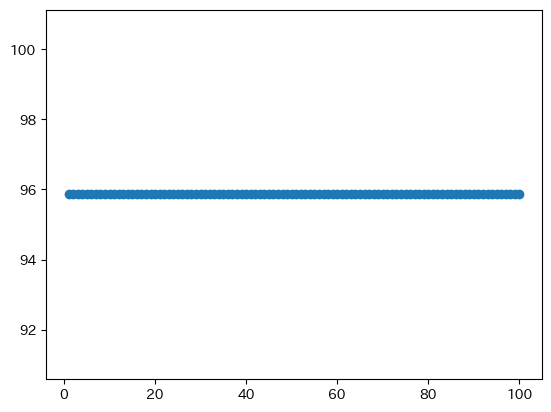

In [16]:
#バッチ学習
epochs = 100
alpha = 0.1

batch_size = X.shape[0]
np.random.seed(1)
lr = LinearRegression(n_dims=X.shape[1])
_ = [i+1 for i in range(epochs)]

cost_J = []
for epoch in range(epochs):
    # 勾配降下法を実装
    
    c = mse(lr.predict(X_test), y_test)
    print("EPOCH: {}, cost: {}".format(epoch, c))
    cost_J.append(c)

print(np.min(cost_J))
plt.scatter(_, cost_J)

EPOCH: 0, cost: 115.11757161111059, MSE: 95.85528348481593
EPOCH: 1, cost: 87.69588896946085, MSE: 95.85528348481593
EPOCH: 2, cost: 63.21048148592526, MSE: 95.85528348481593
EPOCH: 3, cost: 84.39322614080271, MSE: 95.85528348481593
EPOCH: 4, cost: 128.63702786596804, MSE: 95.85528348481593
EPOCH: 5, cost: 53.22849079244871, MSE: 95.85528348481593
EPOCH: 6, cost: 101.5787914067132, MSE: 95.85528348481593
EPOCH: 7, cost: 78.28980001907264, MSE: 95.85528348481593
EPOCH: 8, cost: 42.67941755332268, MSE: 95.85528348481593
EPOCH: 9, cost: 40.210202790755304, MSE: 95.85528348481593
14.138700454823615


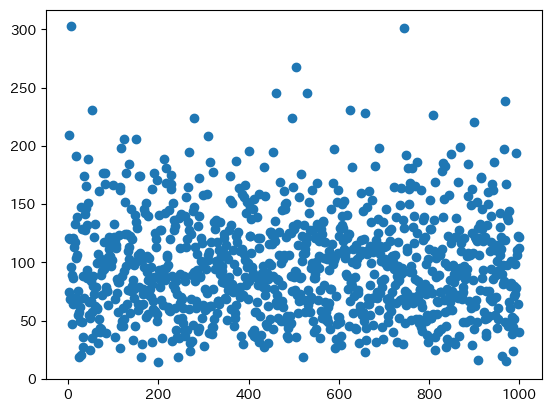

In [17]:
#ミニバッチ学習
batch_size = 10
alpha = 0.01

iter = int(X.shape[0]/batch_size)
epochs = 10
np.random.seed(1)
mini_lr = LinearRegression(n_dims=X.shape[1])
_ = [i+1 for i in range(iter*epochs)]
cost_J = []


for epoch in range(epochs):
    # np.random.permutation : 配列の要素をランダムに並べ替える関数
    # [1, 2, 3, 4, 5, 6] -> [5, 3, 1, 4, 6, 2]
    idxs = np.random.permutation(X.shape[0])
    idxs = np.array_split(idxs, iter)
    for idx in idxs:
        _X = X[idx][:]
        _y = y[idx][:]
        c = mini_lr.gradient_descent(_X, _y, alpha=alpha)
        cost_J.append(c)
    print("EPOCH: {}, cost: {}, MSE: {}".format(epoch, c, mse(mini_lr.predict(X_test), y_test)))

print(np.min(cost_J))
plt.scatter(_, cost_J)

In [ ]:
# オンライン学習を実装してください

## 正規方程式

目的関数の偏微分の値は以下の通り．
簡単のため，以下のようにデータを書き換える．

（定数項をパラメータのベクトルに追加）
\begin{align}
        \mathbf{w} = \begin{pmatrix}
        w_0 \\
        w_1 \\
        w_2 \\
        \vdots \\
        w_n
        \end{pmatrix}
        \,, 
        X = 
        \begin{pmatrix}
        \mathbf{1} &
        \mathbf{x}_1 & 
        \mathbf{x}_2 & 
        \cdots &
        \mathbf{x}_n 
        \end{pmatrix}
        \,,
        \mathbf{y} = 
        \begin{pmatrix}
        y_1 \\
        \vdots \\
        y_N 
        \end{pmatrix}
        \,,
\end{align} \\

すると，先ほどの偏微分が以下のように書ける．
$$
\frac{∂J}{∂\mathbf{w}} = X^T\delta_y \\ 
$$

これが＝０になればよいので（傾き０が最小値）

$$
\begin{align}
&X^T\delta_y = 0\\
&↔ X^T(\hat{y}-y) = 0 \\
&↔ X^T(Xw-y) = 0 \\
&↔ X^TXw = X^Ty \\
&↔ w = (X^TX)^{-1}X^Ty \\
\end{align}
$$

と解析的に（方程式を解くことによって）求めることができる．

この答えは，最良線形不偏推定量（Best Linear Unbiased Estimator: BLUE）であることが知られている．


In [18]:
#解析解
print(X.shape)
print(np.insert(X, 0, 1, axis=1).shape)
_X = np.insert(X, 0, 1, axis=1)
w = np.linalg.inv(_X.T @ _X+1e-5*np.eye(_X.shape[1],_X.shape[1])) @ _X.T @ y.reshape(-1, 1)
print(w.shape)
print(_X.shape)
print(np.linalg.norm(y - _X @ w)**2) 

(1000, 100)
(1000, 101)
(101, 1)
(1000, 101)
1.0892633215380921e-11


## sklearnによる実装

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [20]:
california = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.7)

In [21]:
batch_size = 258 #86　129　144　172　258 6192
iter = int(X_train.shape[0]/batch_size)
epochs = 1000
np.random.seed(1)
mini_lr = LinearRegression(n_dims=X_train.shape[1])
y_train = y_train.reshape(-1, 1)

alpha = 1e-7
for epoch in range(epochs):
    idxs = np.random.permutation(X_train.shape[0])
    idxs = np.array_split(idxs, iter)
    for idx in idxs:
        _X = X_train[idx][:]
        _y = y_train[idx][:]
        cost = mini_lr.gradient_descent(_X, _y, alpha=alpha)
    y_test_pred = mini_lr.predict(X_test)
    mse = mean_squared_error(y_test_pred, y_test.reshape(-1,1))
    if epoch % 1000 == 999 or epoch == 0:
        print(f"EPOCH: {epoch+1} Valid Cost: {cost:.3f} Valid Mean Squared Error: {mse:.3f}")
    if epoch == 2000:
        alpha /= 10
    if epoch == 8000:
        alpha /= 10

EPOCH: 1 Valid Cost: 11502.242 Valid Mean Squared Error: 10634.890
EPOCH: 1000 Valid Cost: 13407.926 Valid Mean Squared Error: 10634.890


In [22]:
_X_train = np.insert(X_train, 0, 1, axis=1)
_X_test = np.insert(X_test, 0, 1, axis=1)
w_hat = np.linalg.inv(_X_train.T @ _X_train) @ _X_train.T @ y_train
print(mean_squared_error(y_test, _X_test @ w_hat))

0.5369418246206638


In [23]:
print(mean_squared_error(y_test,mini_lr.predict(X_test))) 

10634.890273468352


# 予測値は正規方程式の方が良い